Code Credit:

University of California San Diego

Department of Electrical and Computer Engineering

Winter 19 ECE 143 Final Project

Member: Nikhil Mohan, Xuezhu Hong, Qi Ma, Changhan Ge

In [140]:
import numpy as np
import pandas as pd 
import seaborn as sns              
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 
from matplotlib.figure import Figure
from random import random

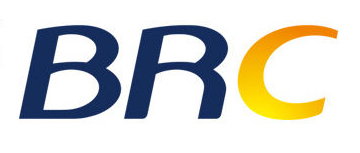

In [141]:
from IPython.display import Image
Image("BRC.jpg")

Ms. Jane Liu who served as HR at BRC, a Chinese Property & Tourism Investment Group, provided 838 samples of information of employees who submitted resignation letter in their culture & tourim branch in 2018. 10% of them withdrew their resignation and are still working in the company

For privacy protection purpose, names and citizen IDs are deleted when the dataset was released.

In [235]:
df = pd.read_csv('BRCLeavingListDataSet.csv', encoding= "ISO-8859-1")

# Data Preprocessing

In [185]:
# Mapping Salary
salary_pre=df['Salary Rank'].str.split(' ',expand=True)
salary_pre.columns=('Rank','Salary Rank')
salary_pre['Salary']=None
for i in range(len(salary_pre)):
    if salary_pre['Rank'][i]=='M':
        salary_pre['Salary'][i]=np.sqrt(float(salary_pre['Salary Rank'][i])*(1+random())-1)
    else:
        salary_pre['Salary'][i]=np.cbrt(float(salary_pre['Salary Rank'][i])*(1+random())-1)
salary=salary_pre['Salary']
salary_nomalize=(salary-np.min(salary))/(np.max(salary)-np.min(salary))
salary_predicted=salary_nomalize*(20000-2000)+2000
df['Salary']=salary_predicted.astype(float)

In [186]:
# Quantitize Education Level
Education=df['Highest Education Level']
Education=Education.to_frame()
Education['Quantitized Education Level']=None
map_table={'Master':5,'Bachelor':4,'Community College, Two-Year Program, or Equivalent ':3,'High School':2,'Under High School':1}
for i in range(len(Education)):
    Education['Quantitized Education Level'][i]=map_table[Education['Highest Education Level'][i]]
df['Quantitized Education Level']=Education['Quantitized Education Level']

In [187]:
# Split Department
Department_pre=df['Description'].str.split('-',expand=True)
Department_pre.columns=('Department','Jobrole')
df['Department']=Department_pre['Department']
df['Jobrole']=Department_pre['Jobrole']

# Data Preview

In [188]:
df.head()

,Gender,Age,Branch,Administration Level,Entry Time,Years of Service,Highest Education Level,Status,Rank,Salary Rank,Description,Attrition,Salary,Quantitized Education Level,Department,Jobrole
0,Female,39,BRC Culture & Tourism,General Manager,3/8/10,9,Bachelor,Full-time,6,M 6.1,Management,Yes,15670.521603,4,Management,None
1,Male,42,BRC Culture & Tourism,Deputy General Manager,5/6/10,8,Master,Full-time,5,M 5.1,Human Resources,Yes,14824.651865,5,Human Resources,None
2,Male,27,BRC Culture & Tourism,Staff,7/1/14,1,Bachelor,Full-time,1,P 1.1,Human Resources,Yes,6496.348286,4,Human Resources,None
3,Male,39,BRC Culture & Tourism,General Manager,8/31/04,13,Bachelor,Full-time,6,M 6.1,Commercial Operation-Commercial Management,Yes,19216.995567,4,Commercial Operation,Commercial Management
4,Female,35,BRC Culture & Tourism,Assistant General Manager,3/18/14,3,Bachelor,Full-time,4,P 4.1,Commercial Operation-Planning,Yes,11112.396503,4,Commercial Operation,Planning


In [189]:
df.describe()

,Age,Years of Service,Rank,Salary
count,838.000000,838.000000,838.000000,838.000000
mean,30.563246,0.299523,1.657518,7177.820918
std,8.268215,0.875677,1.218489,2519.651350
min,17.000000,0.000000,1.000000,2000.000000
25%,24.000000,0.000000,1.000000,5635.004422
50%,29.000000,0.000000,1.000000,6530.746029
75%,35.000000,0.000000,2.000000,7960.994817
max,64.000000,13.000000,8.000000,20000.000000


# Data Analysis

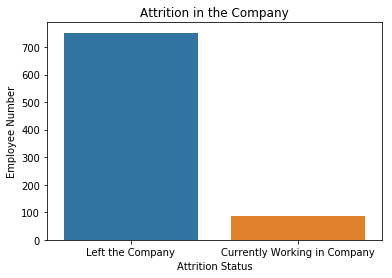

Left the Company                752
Currently Working in Company     86
Name: Attrition, dtype: int64

In [190]:
Attrition = df['Attrition'].apply(lambda x: 'Left the Company' if x == 'Yes' else 'Currently Working in Company')
sns.countplot(Attrition)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')
plt.show()
Attrition.value_counts()

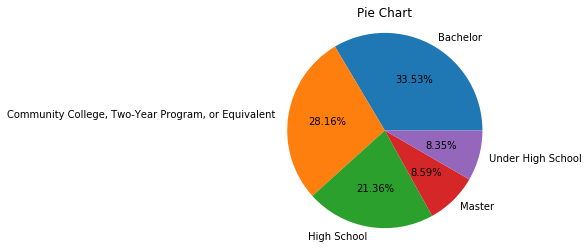

Bachelor                                               281
Community College, Two-Year Program, or Equivalent     236
High School                                            179
Master                                                  72
Under High School                                       70
Name: Highest Education Level, dtype: int64

In [191]:
Edu_Left=df['Highest Education Level']
temp=dict(Edu_Left.value_counts())

labels=list(temp.keys())
datas=list(temp.values())

fig = plt.figure()
plt.pie(datas,labels=labels,autopct='%1.2f%%')
plt.title('Pie Chart')
plt.axis('equal')
plt.show()  

Edu_Left.value_counts()

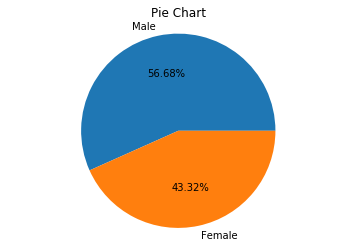

Male      475
Female    363
Name: Gender, dtype: int64

In [236]:
Gen_Left=df['Gender']
temp=dict(Gen_Left.value_counts())

labels2=list(temp.keys())
datas2=list(temp.values())

fig = plt.figure()
plt.pie(datas2,labels=labels2,autopct='%1.2f%%')
plt.title('Pie Chart')
plt.axis('equal')
plt.show()  

Gen_Left.value_counts()

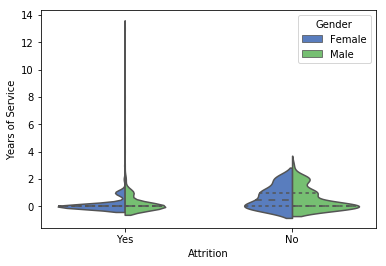

In [192]:
sns.violinplot(x="Attrition", y="Years of Service", hue="Gender", data=df, palette="muted", split=True,
               inner="quartile")
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


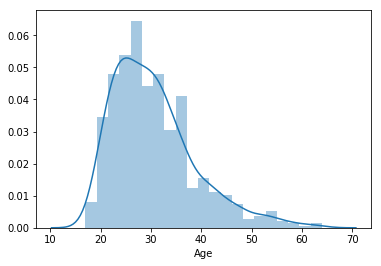

In [193]:
sns.distplot(df['Age'])
plt.show()

In [194]:
atr_yes = df[df['Attrition'] == 'Yes']

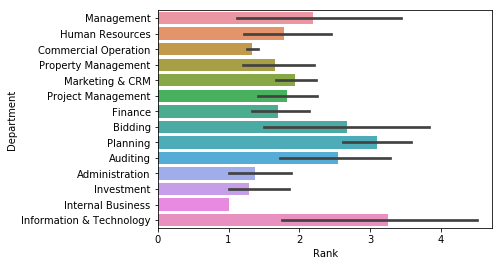

In [195]:
sns.barplot(x = df['Rank'], y = atr_yes['Department'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Monthly Income')

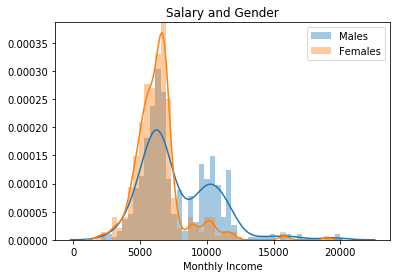

In [196]:
sns.distplot(df.Salary[df.Gender == 'Male'],bins = np.linspace(0, 20000,50))
sns.distplot(df.Salary[df.Gender == 'Female'],bins = np.linspace(0, 20000,50))
plt.title('Salary and Gender')
plt.legend(['Males', 'Females'])
plt.xlabel('Monthly Income')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

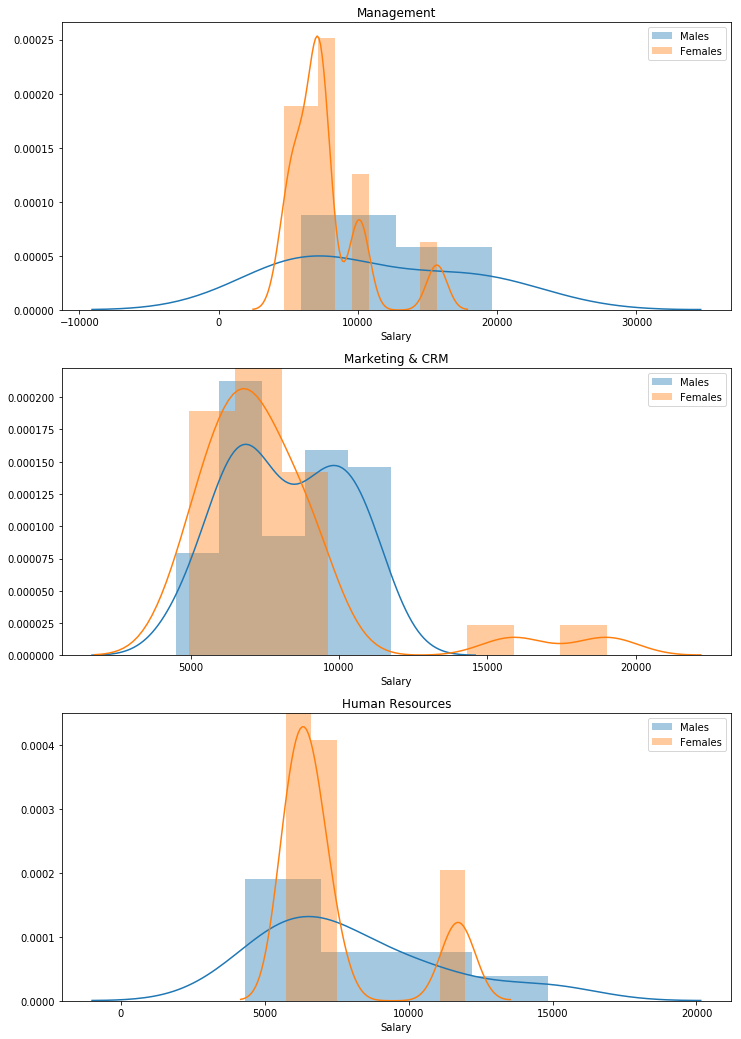

In [234]:
plt.figure(figsize = (12,18))
# subplot of R&D
plt.subplot(3,1,1)
plt.title('Management')
sns.distplot(df.Salary[(df.Department == 'Management') & (df.Gender == 'Male')])
sns.distplot(df.Salary[(df.Department == 'Management') & (df.Gender == 'Female')])
plt.xlabel('Salary')
plt.legend(['Males', 'Females'])
# subplot of Sales
plt.subplot(3,1,2)
plt.title('Marketing & CRM')
sns.distplot(df.Salary[(df.Department == 'Marketing & CRM') & (df.Gender == 'Male')])
sns.distplot(df.Salary[(df.Department == 'Marketing & CRM') & (df.Gender == 'Female')])
plt.xlabel('Salary')
plt.legend(['Males', 'Females'])
# subplot of HR
plt.subplot(3,1,3)
plt.title('Human Resources')
sns.distplot(df.Salary[(df.Department == 'Human Resources') & (df.Gender == 'Male')])
sns.distplot(df.Salary[(df.Department == 'Human Resources') & (df.Gender == 'Female')])
plt.xlabel('Salary')
plt.legend(['Males', 'Females'])

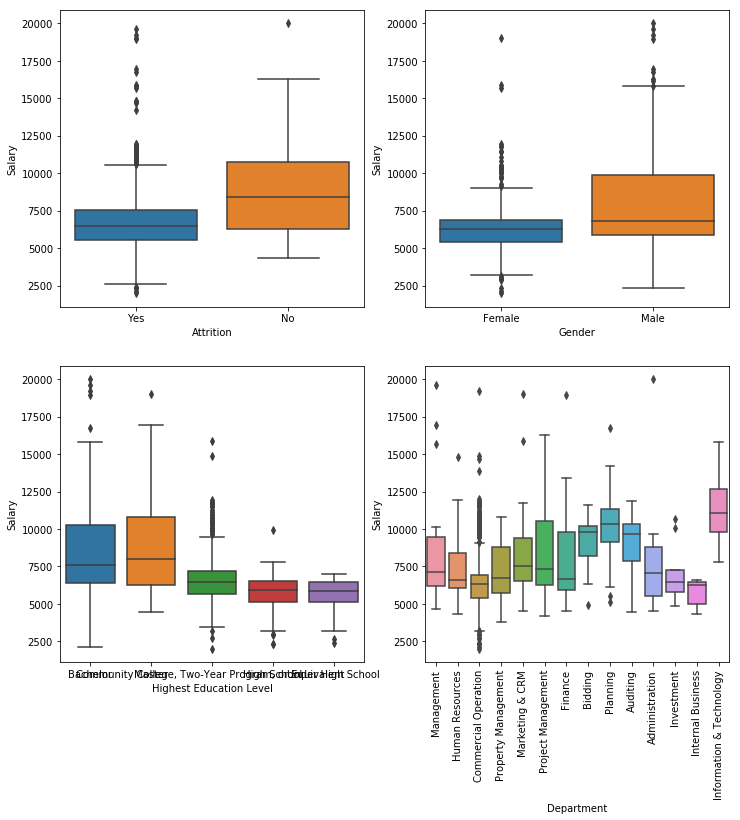

In [226]:
fig,ax = plt.subplots(2,2,figsize=(12, 12))

sns.boxplot(df['Attrition'],df['Salary'],ax = ax[0,0])
sns.boxplot(df['Gender'],df['Salary'],ax = ax[0,1])
sns.boxplot(df['Highest Education Level'],df['Salary'],ax = ax[1,0])
sns.boxplot(df['Department'],df['Salary'],ax = ax[1,1])
plt.xticks(rotation = 90)
plt.show()

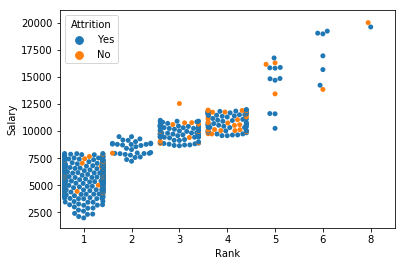

In [200]:
sns.swarmplot(x = 'Rank', y = 'Salary', hue = 'Attrition',data = df)
plt.show()

In [197]:
from ggplot import *

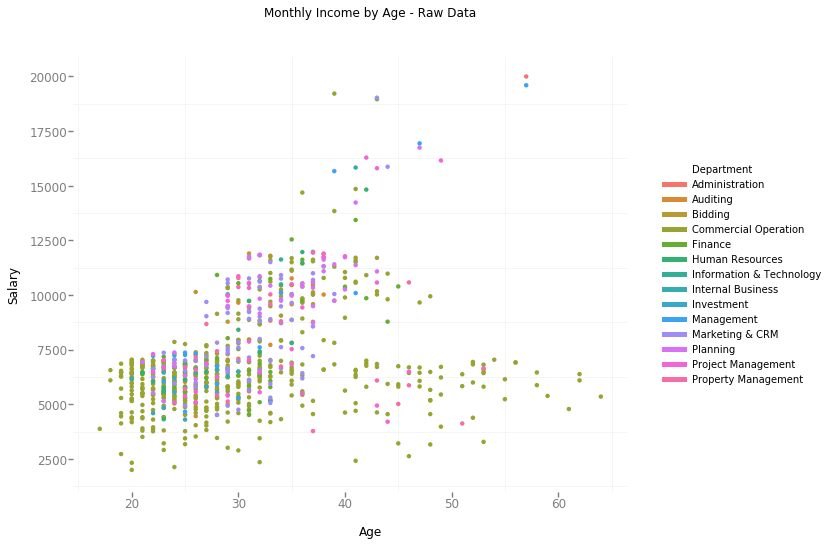

<ggplot: (-9223372029298400666)>

In [198]:
ggplot(aes(x='Age',y='Salary',color = 'Department'), data = df) + \
geom_point() +\
theme_bw() + \
ggtitle('Monthly Income by Age - Raw Data')